In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Explore
print(df.info())
print(df.describe())
print(df.head())
print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
#data cleaning
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates: 1081


In [3]:
print("Shape before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape before removing duplicates: (284807, 31)
Shape after removing duplicates: (283726, 31)


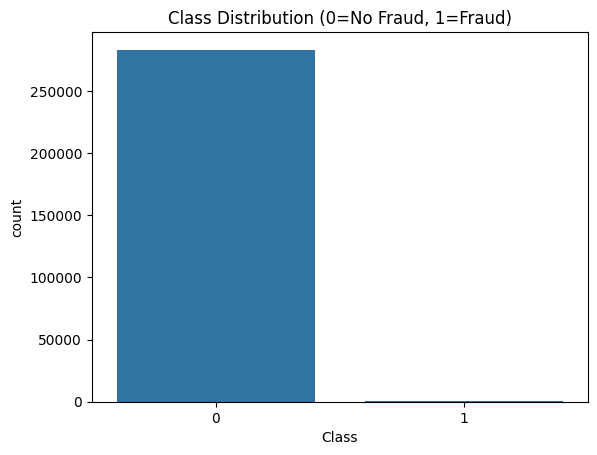

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


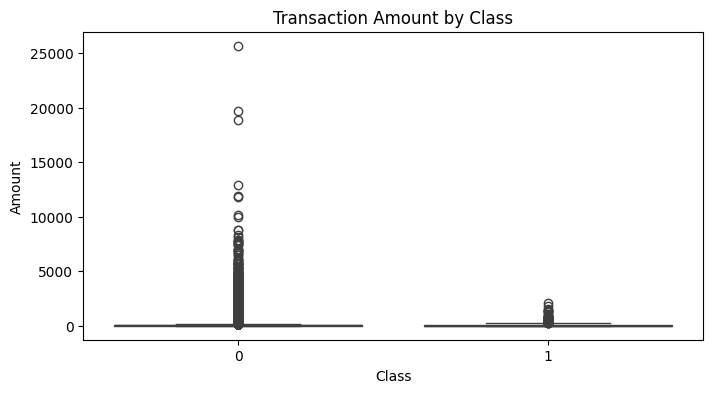

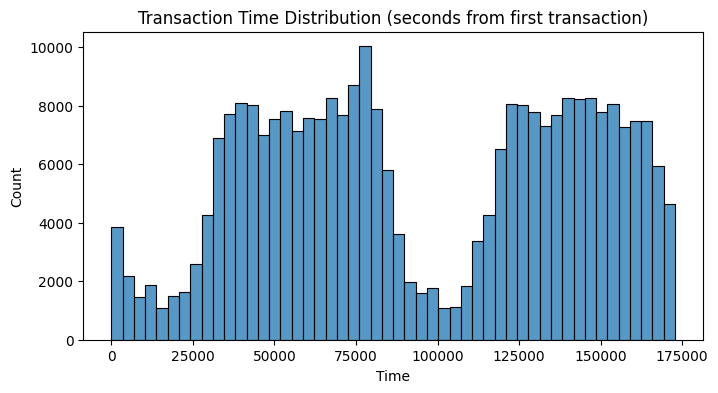

In [4]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0=No Fraud, 1=Fraud)")
plt.show()

print(df['Class'].value_counts(normalize=True))

# 2. Amount distribution by class
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()

# 3. Time feature histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution (seconds from first transaction)")
plt.show()


In [5]:
print(df['Class'].value_counts(normalize=True))


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [7]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 21.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale Amount
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Drop original Amount and Time
df = df.drop(['Amount', 'Time'], axis=1)

# Define X and y
X = df.drop('Class', axis=1)
y = df['Class']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC: 0.9646709446295834


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize model with class_weight to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluation
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9299142766096014


In [12]:
pip install imblearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.7 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.1
    Uninstalling scikit-learn-1.7.1:
      Successfully uninstalled scikit-learn-1.7.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [imblearn]2/4 [imbalanced-learn]
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities from your Random Forest model
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Try different thresholds, e.g., 0.1, 0.2, 0.3, ..., 0.9
threshold = 0.3
y_pred_thresh = (y_scores >= threshold).astype(int)

print(f"Classification report at threshold {threshold}:")
print(classification_report(y_test, y_pred_thresh))




Classification report at threshold 0.3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

